In [1]:
import scyjava as sj              # {optional} Set memory pool
from skimage import io            # ImageJ opener, open the image on the background ImageJ
from IPython.display import Image # Display only images
import os                         # Used to manipulate and create directory with python. 
from skimage import io
import pandas as pd

# Import ImageJ library and Initialize imageJ.

In [2]:
import imagej
ij = imagej.init('net.imagej:imagej+net.imagej:imagej-legacy') #In this way, the LATEST online version of the software is imported
# ij = imagej.init(mode='headless',add_legacy=True) # hypothesis: the more recent version of ImageJ that is compatible with Java v11.0.23 is needed
#Print imageJ version

print("The actual version of ImageJ is:", ij.getApp().getInfo(True))

The actual version of ImageJ is: ImageJ2 2.15.0/1.54f; Java 11.0.23 [x86_64]; 43MB of 4096MB


# Macro 

Operating in headless mode - the original ImageJ will have limited functionality.


Running macro:

//Macro Code
open("/Users/Daniel/Desktop/micrographs/image.png");
run("8-bit");
setAutoThreshold("Default");
run("Analyze Particles...", "show=Overlay display clear add");
saveAs("TIFF", "/Users/Daniel/Desktop/outputx2");
saveAs("Results","/Users/Daniel/Desktop/particles_resultsx2.csv")


Operating in headless mode - the WindowManager class will not be fully functional.


 	Area	Mean	StdDev	Min	Max	X	Y	XM	YM	Perim.	Feret	Median	FeretX	FeretY	FeretAngle	MinFeret
1	23137	1.472	10.622	0	123	470.088	193.627	471.846	192.235	569.571	173.003	0	452	109	102.349	172
java.awt.HeadlessException
	at java.desktop/java.awt.GraphicsEnvironment.checkHeadless(GraphicsEnvironment.java:208)
	at java.desktop/java.awt.Window.<init>(Window.java:548)
	at java.desktop/java.awt.Frame.<init>(Frame.java:423)
	at ij.plugin.frame.PlugInFrame.<init>(PlugInFrame.java:13)
	at ij.plugin.frame.RoiManager.<init>(RoiManager.java:108)
	at ij.macro.Interpreter.getBatchModeRoiManager(Interpreter.java:2283)
	at ij.plugin.filter.ParticleAnalyzer.addToRoiManager(ParticleAnalyzer.java:981)
	at ij.plugin.filter.ParticleAnalyzer.analyzeParticle(ParticleAnalyzer.java:933)
	at ij.plugin.filter.ParticleAnalyzer.analyze(ParticleAnalyzer.java:630)
	at ij.plugin.filter.ParticleAnalyzer.run(ParticleAnalyzer.java:280)
	at ij.plugin.filter.PlugInFilterRunner.processOneImage(PlugInFilterRunner.java:266)
	at 

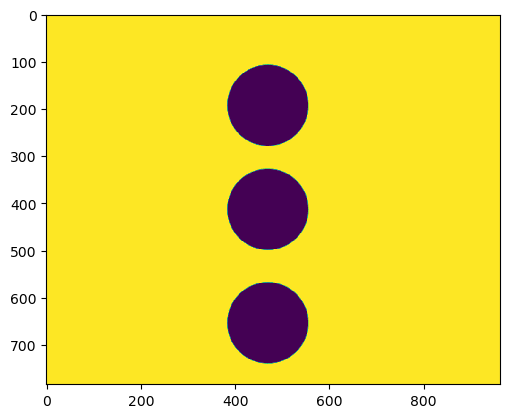

Operating in headless mode - the IJ class will not be fully functional.



Thresholded,8-bit Image: 


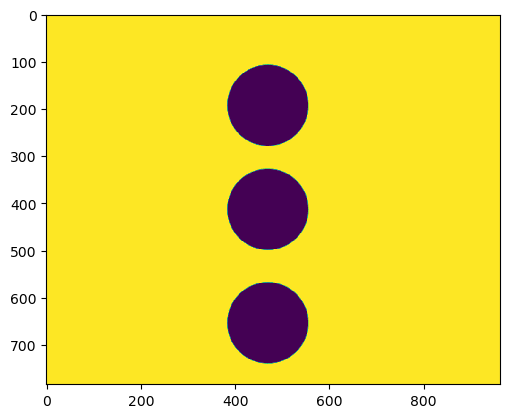

In [3]:
# create macro script
import os 

def analyze_particles(input_image,output_path,results_path,method):
    macro_cmd = f"""
//Macro Code
open("{input_image}");
run("8-bit");
setAutoThreshold("{method}");
run("Analyze Particles...", "show=Overlay display clear add");
saveAs("TIFF", "{output_path}");
saveAs("Results","{results_path}")""" #.format(input_image,output_path,results_path,method)# string based commands , using C++ 


# Set Auto threshold will probably yield errors? 

    # run macro script 
    print("Running macro:")
    print(macro_cmd)

    # Run the macro command
    try:
        result0 = ij.py.run_macro(macro_cmd)
        print("Macro executed successfully.")


    except Exception as e:
        print(f"Error executing macro: {e}")

    # Verify if the file was saved
    if os.path.exists(output_path):
        print(f"Thresholded image saved successfully at {output_path}")
    else:
        print(f"Failed to save the thresholded image at {output_path}")
    return 0

analysis1 = analyze_particles(input_image= "/Users/Daniel/Desktop/micrographs/image.png", output_path="/Users/Daniel/Desktop/outputx2", 
                method="Default",results_path= '/Users/Daniel/Desktop/particles_resultsx2.csv')


opened_image = ij.py.active_imageplus() # activates the opened image

ij.py.show(opened_image) # display image

# Optional: show the processed image using Python
thresholded_image = ij.py.from_java(ij.IJ.getImage())
print("\nThresholded,8-bit Image: ")
ij.py.show(thresholded_image)
